<a href="https://colab.research.google.com/github/diyaacharya/Ukraine-Russia-War-Reddit-Sentiment-Analysis/blob/main/Ukraine_russia_war_reddit_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ukraine Russia War Sentiment Analysis Using Reddit Api

## Installing neccessary libraries

 Installing Praw library to extract data from Reddit

In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


   Installing Library to Convert Emogis Into Their Textual Meaning

In [ ]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installing library to detect the language of the text

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Necesary Libraries for Analysis

In [ ]:

import re 
import os
from datetime import datetime 
import string

import numpy as np
import pandas as pd

from praw.models import MoreComments
import praw

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import *

from wordcloud import WordCloud

from textblob import TextBlob




import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)


## Connecting to the API and getting authentication

In [ ]:


# Read-only instance
rt= praw.Reddit(client_id="8G03TTjho_-xIwL3W--hdQ",         # your client id
                               client_secret="MABnozw9niTeHrmklrgcoWGSwne3yQ",      # your client secret
                               user_agent="nlp") 

## Passing URLs of the Post related to Ukraine Russia Conflict

In [ ]:
urls=["https://www.reddit.com/r/ukraine/comments/vlvgj4/nato_to_dramatically_increase_forces_on_high/",
      "https://www.reddit.com/r/worldnews/comments/usnlel/nato_now_has_40000_soldiers_on_europes_border/",
      "https://www.reddit.com/r/AskReddit/comments/s9qcl0/whats_the_reason_for_the_beef_between_russia_and/",
      "https://www.reddit.com/r/ukraine/comments/vpcf6g/i_am_especially_grateful_to_the_united_states_of/",
      "https://www.reddit.com/r/UkrainianConflict/comments/vpkuzv/moscow_officials_terrified_of_working_in_occupied/",
      "https://www.reddit.com/r/economy/comments/vpqdoy/ukraine_has_exposed_russia_as_a_notsogreat_power/",
      "https://www.reddit.com/r/europe/comments/vplwlk/the_poll_of_ukrainians_here_is_the_result/",
      "https://www.reddit.com/r/ukraine/comments/ud750m/putin_threatens_with_immediate_strikes_against/",
      "https://www.reddit.com/r/worldnews/comments/vp5cry/putins_war_has_killed_343_children_in_ukraine/",
      "https://www.reddit.com/r/news/comments/vpnwdx/ukraine_says_russia_dropped_phosphorus_bombs_on/",
      "https://www.reddit.com/r/ukraine/comments/vpq5t7/fierce_fighting_ongoing_near_lysychansk_city_not/",
      "https://www.reddit.com/r/UkrainianConflict/comments/vp782j/russia_admits_its_running_out_of_weapons_in/",
      "https://www.reddit.com/r/UkraineRussiaReport/comments/vpkhac/ru_pov_russian_forces_using_javelins_on_ukrainian/",
      "https://www.reddit.com/r/UkraineRussiaReport/comments/up1xmu/discussionquestion_thread/",
      "https://www.reddit.com/r/UkraineWarVideoReport/comments/vlebe7/ukraine_war_megathread_for_the_week_of_june_26/",
      "https://www.reddit.com/r/UkraineWarVideoReport/comments/vp5wie/ukrainian_artillery_putting_m777_to_good_use/",
      "https://www.reddit.com/r/UkraineWarVideoReport/comments/vp7u7e/ukrainian_fighters_at_one_of_the_uks_largest/",
      "https://www.reddit.com/r/UkraineWarVideoReport/comments/vpfhwr/russian_tigerm_after_a_mine_explosion_the_crew/",
      "https://www.reddit.com/r/UkrainianConflict/comments/vakg0a/putin_is_preparing_to_starve_much_of_the/",
      "https://www.reddit.com/r/ukraine/comments/vpoerb/panzerhaubitze_2000_already_used_against_russian/",
      "https://www.reddit.com/r/UkraineInvasionVideos/comments/t85pnl/ukraine_will_never_give_up/",
      "https://www.reddit.com/r/ukraine/comments/vpm7nn/enemys_ammo_storage_hit_at_popasna_very_big_boom/",
      "https://www.reddit.com/r/worldnews/comments/swb4mv/rworldnews_live_thread_ukrainerussia_tensions/",
      "https://www.reddit.com/r/worldnews/comments/stgev6/rworldnews_live_thread_ukrainerussia_tensions/",
      "https://www.reddit.com/r/worldnews/comments/szswcj/rworldnews_live_thread_ukrainerussia_crisis/",
      "https://www.reddit.com/r/worldnews/comments/uc5g2s/ukraine_russia_says_it_is_engaged_in_war_with/",
      "https://www.reddit.com/r/europe/comments/vhz0q7/ukraine_war_underscores_need_for_permanent_nato/",
      "https://www.reddit.com/r/worldnews/comments/unxocr/kremlin_says_finland_joining_nato_is_definitely_a/",
      "https://www.reddit.com/r/worldnews/comments/uppube/russia_warns_of_response_if_nato_moves_nuclear/",
      "https://www.reddit.com/r/ukraine/comments/vprnbw/russian_tank_crew_decided_to_become_cosmonauts/",
      "https://www.reddit.com/r/ukraine/comments/vpm4rw/how_useful_could_that_thing_be/",
      "https://www.reddit.com/r/UkrainevRussia/comments/mrh8sa/russia_to_blockade_mariupol_berdyansk_for/",
      "https://www.reddit.com/r/UkraineWarReports/comments/u7s139/using_nukes_would_force_the_world_to_put_an_end/"]
submissions=[]
for url in urls:

  submissions.append(rt.submission(url=url))

In [ ]:
len(submissions)

33

## Extracting Comments For All the posts Mentioned

In [ ]:
comments=[]
date_c=[]
post_uri=[]
comment_uri=[]
for sub in submissions:
  for top_level_comment in sub.comments:
    if type(top_level_comment) == MoreComments:
        continue
    (comments.append(top_level_comment.body))
    
    unix_time = top_level_comment.created_utc 
    comment_uri.append(top_level_comment.id)
    post_uri.append(sub.id)
    date_c.append(str(datetime.fromtimestamp(unix_time)).split()[0]) 


It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

In [ ]:
len(comments)

2787

## Creating Dataframe With Comment, its Date, Post ID , Comment ID

In [ ]:
df=pd.DataFrame({"comments":comments,"date":date_c,"post_id":post_uri,"comment_id":comment_uri})

In [ ]:
df.to_csv("untidy_reddit_raw.csv")

In [ ]:
df

,comments,date,post_id,comment_id
0,"Hello /u/hjgbuijhgh,\n\nThis community is focu...",2022-06-27,vlvgj4,idxd71z
1,uhm thats quite the increase. \n\n\nI also he...,2022-06-27,vlvgj4,idxdtuz
2,Poland also announced that they plan to double...,2022-06-27,vlvgj4,idxit01
3,"Remember, NATO knows more than we’re being tol...",2022-06-27,vlvgj4,idxh1fc
4,"Well done, Putin. Top 2022 salesman of NATO. \...",2022-06-27,vlvgj4,idxhl5a
...,...,...,...,...
2782,Putin has a paradoxical combination of grandio...,2022-05-06,u7s139,i7iejwq
2783,OP you have absolutely zero comprehension of w...,2022-05-10,u7s139,i81okk5
2784,"Call his hand, he will never launch ICBM's and...",2022-06-07,u7s139,ibjovef
2785,Surrender Putler,2022-06-19,u7s139,icwct5p


In [ ]:

df=df.sort_values(by='date',ascending=False)
df

,comments,date,post_id,comment_id
2786,The use of nukes would trigger ww3 and nobody ...,2022-07-09,u7s139,ifgmmv0
778,How do you think this war will pan out during ...,2022-07-09,up1xmu,iffwjex
761,I want to thank the creators of this sub. This...,2022-07-08,up1xmu,ifdx3e6
790,"Pro Russians, if Russia captures all of the Do...",2022-07-07,up1xmu,if7dwow
755,"Just found this sub, is this actually a neutra...",2022-07-07,up1xmu,if9ky8s
...,...,...,...,...
2727,Why October though? You figured they'd do this...,2021-04-15,mrh8sa,gumlde4
2728,shits really heating up,2021-04-15,mrh8sa,gum8piv
2729,Maby its a response to the current Nato exerci...,2021-04-15,mrh8sa,gumdufb
2747,This has nothing with Ukrainian crisis. Russia...,2021-04-15,mrh8sa,gum9xfl


# Data Preprocessing

## Discarding comments that are removed by the user
This removed comment is indicated as'[removed]' in the dataset.

In [ ]:
df = df.drop(df[df["comments"]== '[removed]'].index)

In [ ]:
len(df)

2748

## Removing Duplicated comments

In [ ]:
df.drop_duplicates(subset ="comments",keep=False,inplace=True)

In [ ]:
len(df)

2670

## Removing User Names from the comments 
This information is redundant with respect to analysis therefore must be removed. This is indicated by /u/

In [ ]:
df["cleaned_comments"] = df["comments"].str.replace(r"[/]*u[/][\w]*", ' ').str.strip()

In [ ]:
df.head(20)

,comments,date,post_id,comment_id,cleaned_comments
2786,The use of nukes would trigger ww3 and nobody ...,2022-07-09,u7s139,ifgmmv0,The use of nukes would trigger ww3 and nobody ...
778,How do you think this war will pan out during ...,2022-07-09,up1xmu,iffwjex,How do you think this war will pan out during ...
761,I want to thank the creators of this sub. This...,2022-07-08,up1xmu,ifdx3e6,I want to thank the creators of this sub. This...
790,"Pro Russians, if Russia captures all of the Do...",2022-07-07,up1xmu,if7dwow,"Pro Russians, if Russia captures all of the Do..."
755,"Just found this sub, is this actually a neutra...",2022-07-07,up1xmu,if9ky8s,"Just found this sub, is this actually a neutra..."
787,There are rumours that Russians are making new...,2022-07-07,up1xmu,if7k619,There are rumours that Russians are making new...
753,The rest of the world has lost some massive tr...,2022-07-07,up1xmu,if91smk,The rest of the world has lost some massive tr...
802,You can discuss inflated statics till infinity...,2022-07-07,up1xmu,if6btp6,You can discuss inflated statics till infinity...
758,I have seen 5 confirmed instances of Ukrainian...,2022-07-06,up1xmu,if3f4m4,I have seen 5 confirmed instances of Ukrainian...
797,I don't know what they discussed at the G7 but...,2022-07-05,up1xmu,if08n1t,I don't know what they discussed at the G7 but...


## Retaining only English Comments 

In [ ]:
from langdetect import detect

def detect_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

In [ ]:
df = df[df["comments"].apply(detect_english)]

In [ ]:
len(df)

2498

## Converting emogis into their textual meaning
Since emogis have some sentiment it is good to have them in the analysis process

In [ ]:
import emoji
def convert_emoji(text):  
   return emoji.demojize(text, delimiters=("", ""))  

df["cleaned_comments"]=df.apply(lambda x: convert_emoji(x['cleaned_comments']), axis=1)

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

,comments,date,post_id,comment_id,cleaned_comments
2786,The use of nukes would trigger ww3 and nobody ...,2022-07-09,u7s139,ifgmmv0,The use of nukes would trigger ww3 and nobody ...
778,How do you think this war will pan out during ...,2022-07-09,up1xmu,iffwjex,How do you think this war will pan out during ...
761,I want to thank the creators of this sub. This...,2022-07-08,up1xmu,ifdx3e6,I want to thank the creators of this sub. This...
790,"Pro Russians, if Russia captures all of the Do...",2022-07-07,up1xmu,if7dwow,"Pro Russians, if Russia captures all of the Do..."
755,"Just found this sub, is this actually a neutra...",2022-07-07,up1xmu,if9ky8s,"Just found this sub, is this actually a neutra..."
...,...,...,...,...,...
2727,Why October though? You figured they'd do this...,2021-04-15,mrh8sa,gumlde4,Why October though? You figured they'd do this...
2728,shits really heating up,2021-04-15,mrh8sa,gum8piv,shits really heating up
2729,Maby its a response to the current Nato exerci...,2021-04-15,mrh8sa,gumdufb,Maby its a response to the current Nato exerci...
2747,This has nothing with Ukrainian crisis. Russia...,2021-04-15,mrh8sa,gum9xfl,This has nothing with Ukrainian crisis. Russia...


## Removing Links from the data 
These http links are redundant for our analysis 

In [ ]:
no_http = []

df["cleaned_comments"] = df["cleaned_comments"].str.replace(r'.{0,1}\s*https?://\S+(\s+|$)', ' ').str.strip()



In [ ]:
df.head(20)

,comments,date,post_id,comment_id,cleaned_comments
2786,The use of nukes would trigger ww3 and nobody ...,2022-07-09,u7s139,ifgmmv0,The use of nukes would trigger ww3 and nobody ...
778,How do you think this war will pan out during ...,2022-07-09,up1xmu,iffwjex,How do you think this war will pan out during ...
761,I want to thank the creators of this sub. This...,2022-07-08,up1xmu,ifdx3e6,I want to thank the creators of this sub. This...
790,"Pro Russians, if Russia captures all of the Do...",2022-07-07,up1xmu,if7dwow,"Pro Russians, if Russia captures all of the Do..."
755,"Just found this sub, is this actually a neutra...",2022-07-07,up1xmu,if9ky8s,"Just found this sub, is this actually a neutra..."
787,There are rumours that Russians are making new...,2022-07-07,up1xmu,if7k619,There are rumours that Russians are making new...
753,The rest of the world has lost some massive tr...,2022-07-07,up1xmu,if91smk,The rest of the world has lost some massive tr...
802,You can discuss inflated statics till infinity...,2022-07-07,up1xmu,if6btp6,You can discuss inflated statics till infinity...
758,I have seen 5 confirmed instances of Ukrainian...,2022-07-06,up1xmu,if3f4m4,I have seen 5 confirmed instances of Ukrainian...
777,https://mobile.twitter.com/RWApodcast/status/1...,2022-07-05,up1xmu,iezj6ul,Ukrainian society in disarray.


## Removing non word element from the data and  '\n' from the data

In [ ]:
df["cleaned_comments"] = df['cleaned_comments'].str.replace('[^\w\s]','')
df["cleaned_comments"] = df['cleaned_comments'].str.replace('[/\n]*','')

In [ ]:
df[['comments','cleaned_comments']].tail(200)

,comments,cleaned_comments
1699,Hello this is Vladimir\n\n* U.S Military Encry...,Hello this is Vladimir US Military Encrypted
1698,"u/Meizas pointed out to me, the [Russian presi...",pointed out to me the Russian presidential pla...
1697,So what are the chances that Russia will back ...,So what are the chances that Russia will back ...
1694,I’m starting to wonder if Russia has kompromat...,Im starting to wonder if Russia has kompromat ...
1692,Do you ever wonder if this thread could be use...,Do you ever wonder if this thread could be use...
...,...,...
2727,Why October though? You figured they'd do this...,Why October though You figured theyd do this i...
2728,shits really heating up,shits really heating up
2729,Maby its a response to the current Nato exerci...,Maby its a response to the current Nato exerci...
2747,This has nothing with Ukrainian crisis. Russia...,This has nothing with Ukrainian crisis Russia ...


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

True

# Sentiment prediction
Sentiment analysis is done using TextBlob library.
Polarity scores are obtained by vader

In [ ]:
df[['polarity', 'subjectivity']] = df["cleaned_comments"].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))
 
for index, row in df["comments"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
     
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
         
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

## Finding the percentage of each type of comments 

In [ ]:
total_pos = len(df.loc[df['sentiment'] == "positive"])
total_neg = len(df.loc[df['sentiment'] == "negative"])
total_neu = len(df.loc[df['sentiment'] == "neutral"])
total_comments = len(df)
print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_comments)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_comments)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_comments)*100))

Total Positive Tweets % : 33.63
Total Negative Tweets % : 44.96
Total Neutral Tweets % : 21.42


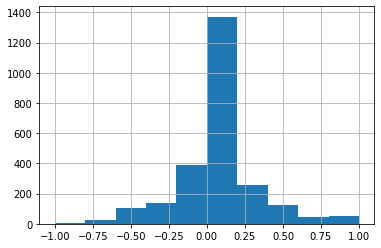

In [ ]:
df['polarity'].hist()

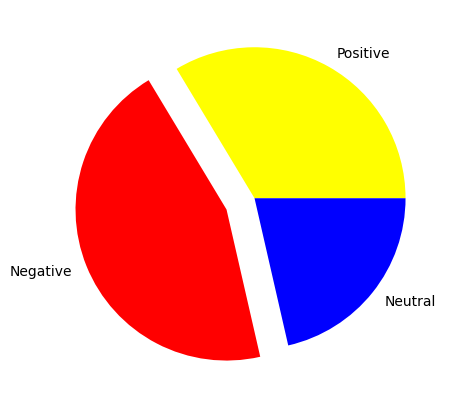

In [ ]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Yellow", "Red", "Blue"]
 
plt.figure(figsize=(8, 5),
           dpi=100)  # Push new figure on stack
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()

In [ ]:
df=df.sort_values(by='date',ascending=False)

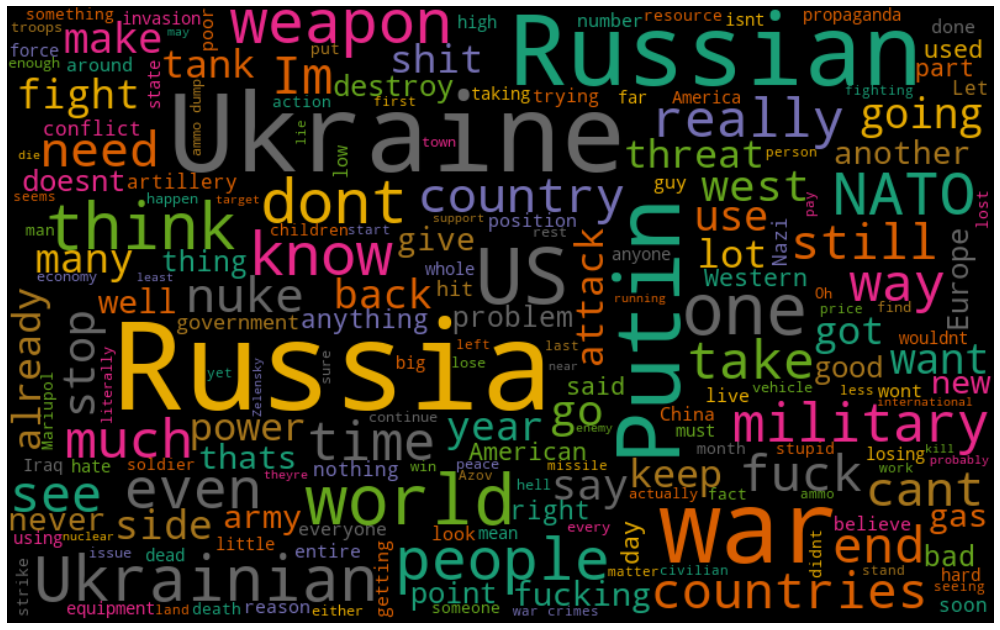

In [ ]:
all_words = ' '.join([text for text in df['cleaned_comments'][df.sentiment == 'negative']])
generate_wordcloud(all_words)

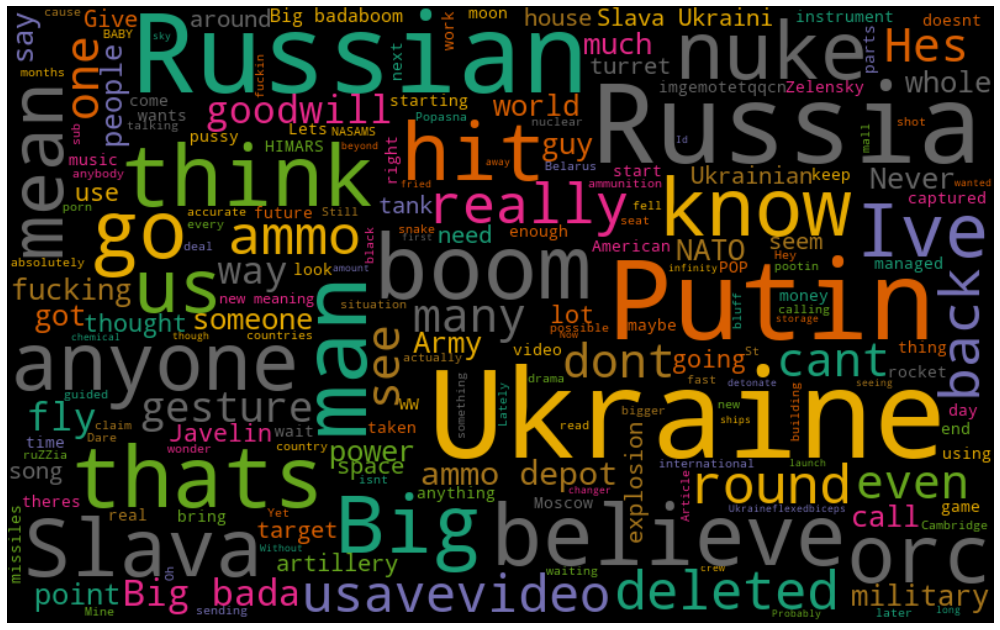

In [ ]:
all_words = ' '.join([text for text in df['cleaned_comments'][df.sentiment == 'neutral']])
generate_wordcloud(all_words)

## Analysing data over a month

In [ ]:


df['date'] = pd.to_datetime(df['date'])  

In [ ]:

mask = (df['date'] > '2022-6-10') & (df['date'] <= '2022-7-10')

In [ ]:
df_22=df.loc[mask]

In [ ]:
import matplotlib.pyplot as plt, numpy as np, matplotlib.dates as mdates 

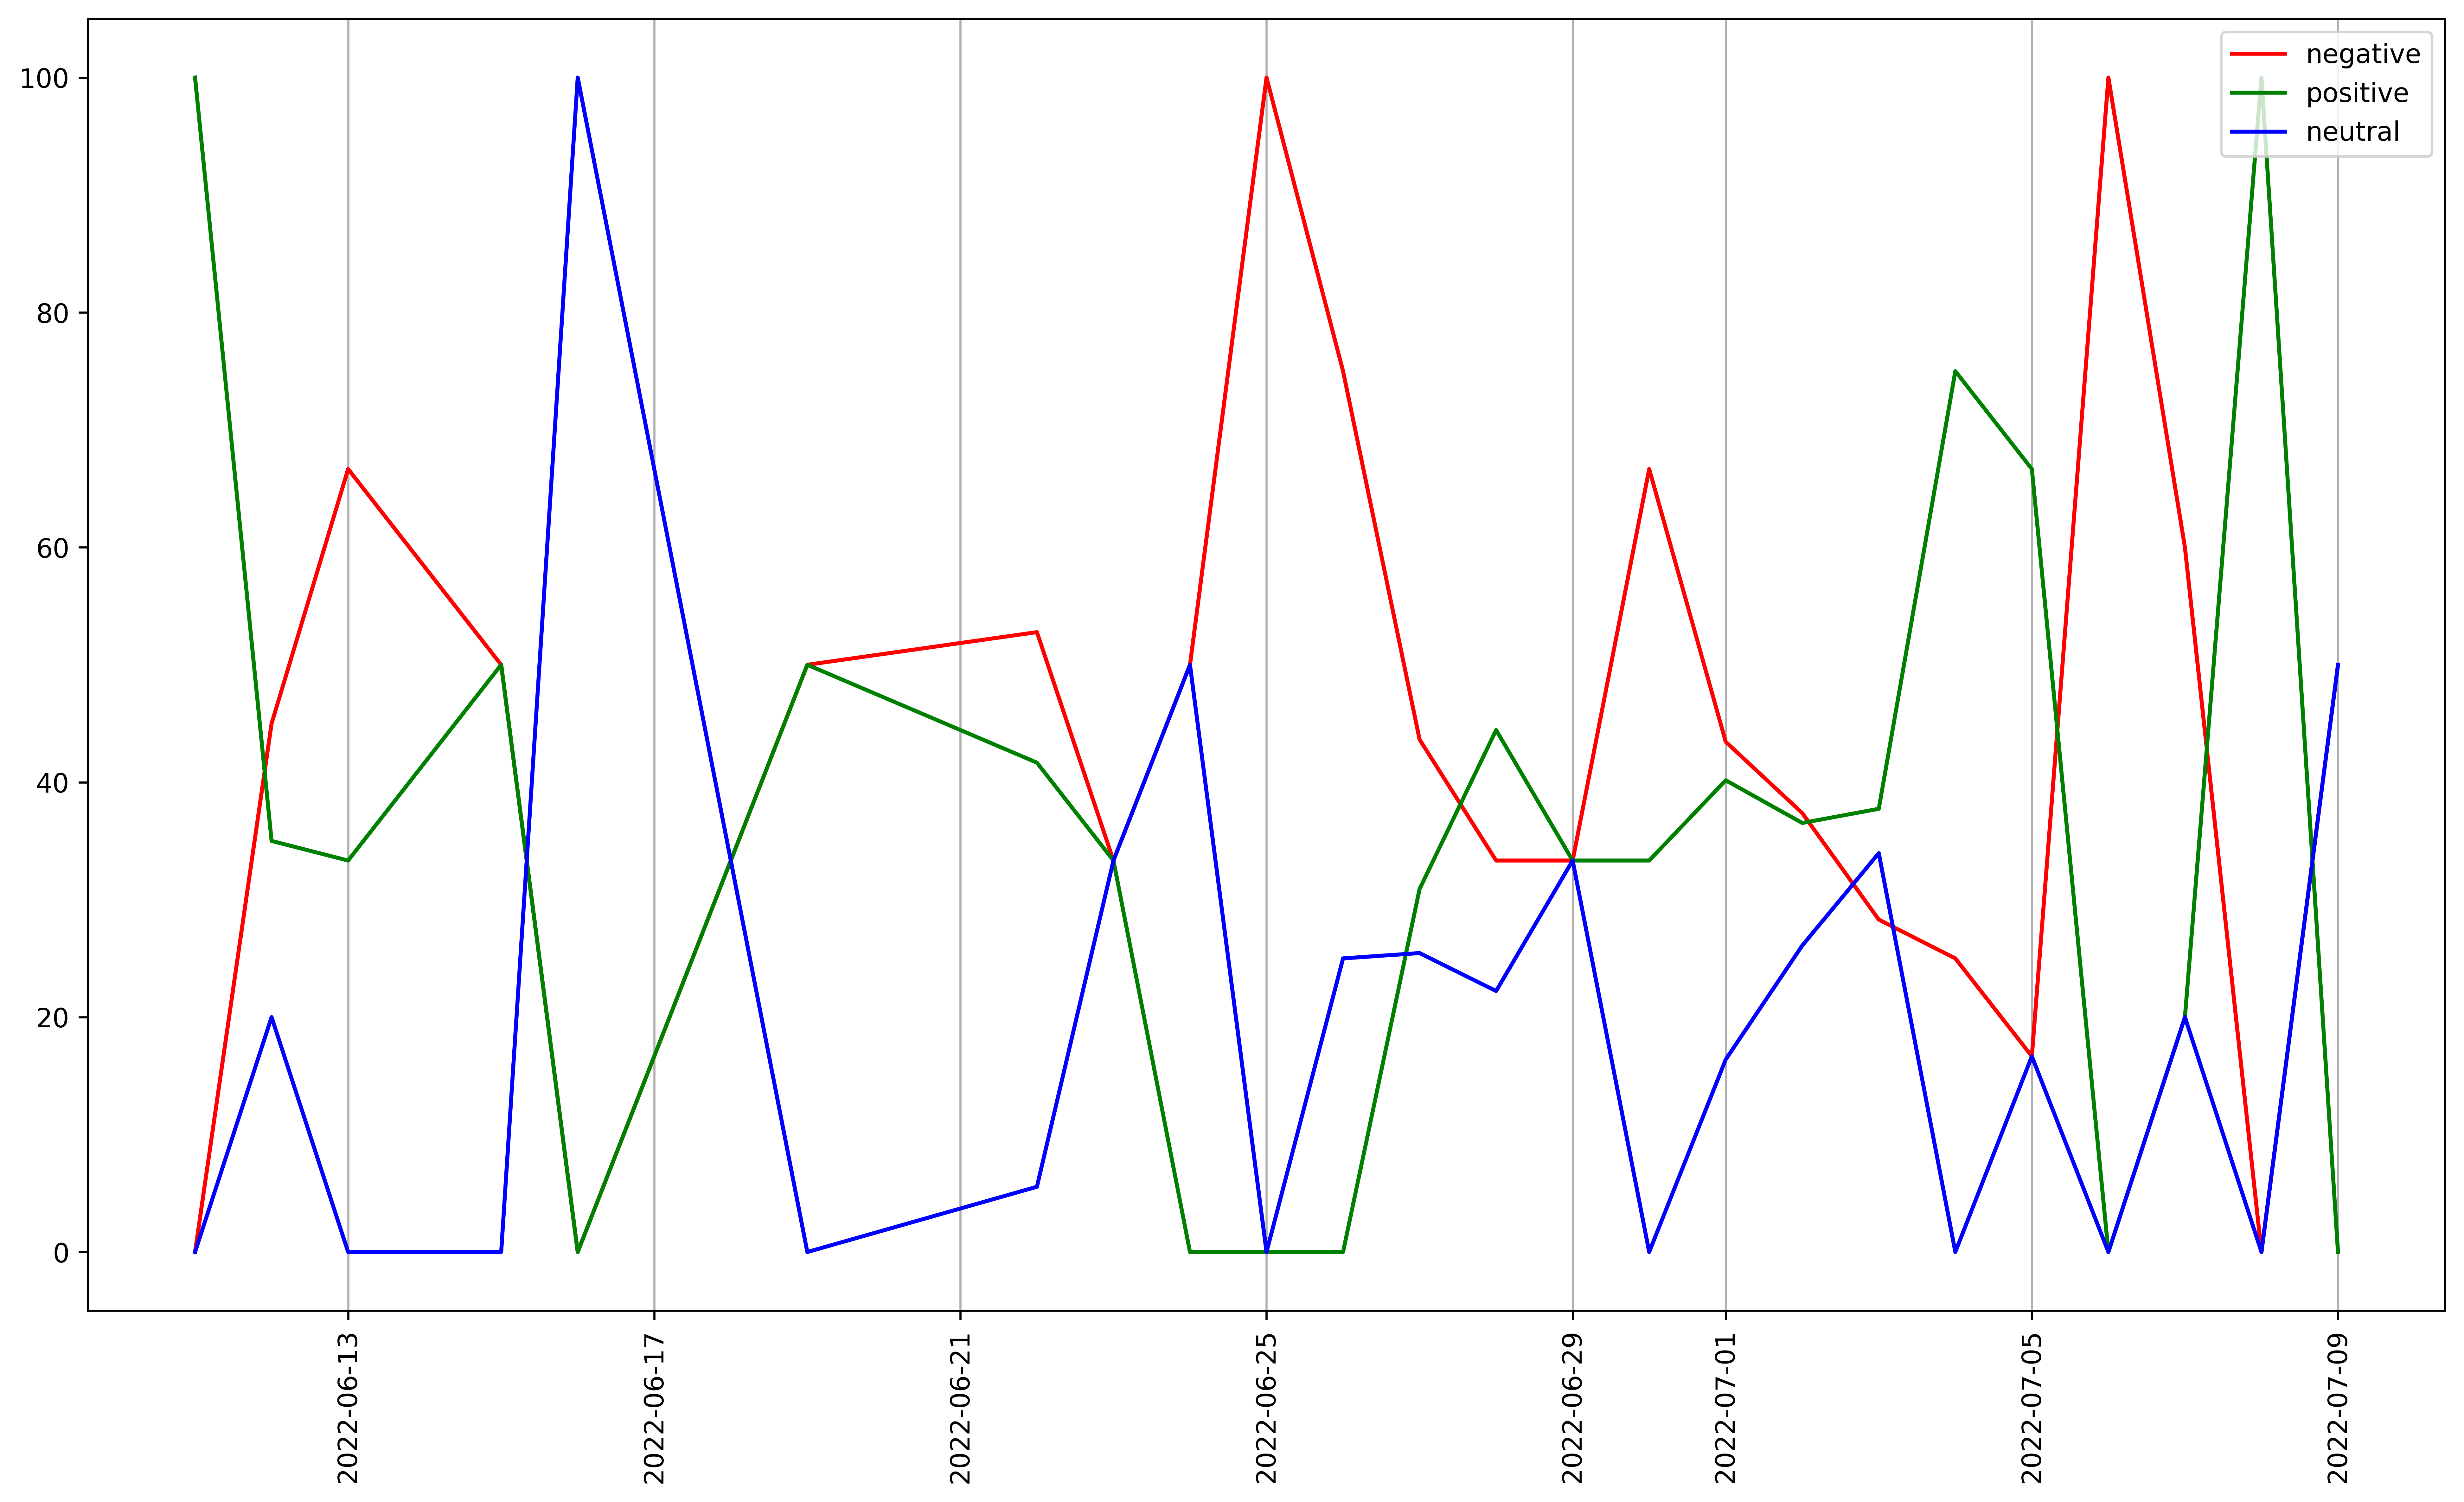

In [ ]:
pos_list = []
neg_list = []
neu_list = []
for i in df_22["date"].unique():
	temp = df_22[df_22["date"] == i]
	positive_temp = temp[temp["sentiment"] == "positive"]
	negative_temp = temp[temp["sentiment"] == "negative"]
	neutral_temp = temp[temp["sentiment"] == "neutral"]
	pos_list.append(((positive_temp.shape[0]/temp.shape[0])*100, i))
	neg_list.append(((negative_temp.shape[0]/temp.shape[0])*100, i))
	neu_list.append(((neutral_temp.shape[0]/temp.shape[0])*100, i))

neu_list = sorted(neu_list, key=lambda x: x[1])
pos_list = sorted(pos_list, key=lambda x: x[1])
neg_list = sorted(neg_list, key=lambda x: x[1])

x_cord_neg = []
y_cord_neg = []

x_cord_pos = []
y_cord_pos = []

x_cord_neu = []
y_cord_neu = []

for i in neg_list:
	x_cord_neg.append(i[0])
	y_cord_neg.append(i[1])


for i in pos_list:
	x_cord_pos.append(i[0])
	y_cord_pos.append(i[1])

for i in neu_list:
	x_cord_neu.append(i[0])
	y_cord_neu.append(i[1])


plt.figure(figsize=(16, 9),dpi=600) # Push new figure on stack
plt.plot(y_cord_neg, x_cord_neg, label="negative",
		color="red")
plt.plot(y_cord_pos, x_cord_pos, label="positive",
		color="green")
plt.plot(y_cord_neu, x_cord_neu, label="neutral",
		color="blue")

plt.xticks(rotation=90)
plt.grid(axis='x')

plt.legend()


Analysing for negative comments

(array([738319., 738323., 738327., 738331., 738335., 738337., 738341.,
        738345.]), <a list of 8 Text major ticklabel objects>)

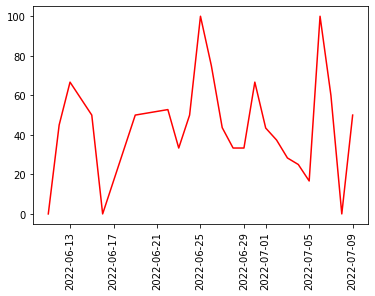

In [ ]:
plt.plot(y_cord_neg, x_cord_neg, label="negative",
		color="red")
plt.xticks(rotation=90)

Analysing for positive comments

(array([738319., 738323., 738327., 738331., 738335., 738337., 738341.,
        738345.]), <a list of 8 Text major ticklabel objects>)

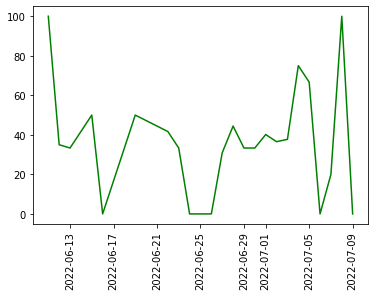

In [ ]:

plt.plot(y_cord_pos, x_cord_pos, label="positive",
		color="green")


plt.xticks(rotation=90)

Analysing for neutral comments 

(array([738319., 738323., 738327., 738331., 738335., 738337., 738341.,
        738345.]), <a list of 8 Text major ticklabel objects>)

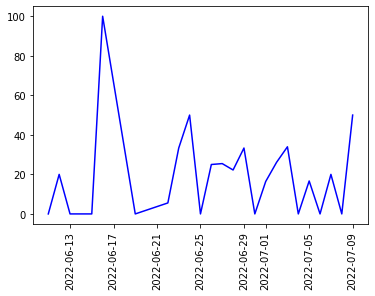

In [ ]:
plt.plot(y_cord_neu, x_cord_neu, label="neutral",
		color="blue")

plt.xticks(rotation=90)

## N-Gram Representation of the data

In [ ]:
# Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if
                    char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
 
 
df_list['punct'] = df_list['cleaned_comments'].apply(
  lambda x: remove_punct(x))
 
# Applying tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
 
 
df_list['tokenized'] = df_list['punct'].apply(
    lambda x: tokenization(x.lower()))
 
# Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
 
def remove_stopwords(text):
    text = [word for word in text if
            word not in stopword]
    return text
 
df_list['nonstop'] = df_list['tokenized'].apply(
  lambda x: remove_stopwords(x))
 
# Applying Stemmer
ps = nltk.PorterStemmer()
 
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
 
df_list['stemmed'] = df_list['nonstop'].apply(
  lambda x: stemming(x))
 
df_list.head()

,comments,date,post_id,comment_id,cleaned_comments,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
2786,The use of nukes would trigger ww3 and nobody ...,2022-07-09,u7s139,ifgmmv0,The use of nukes would trigger ww3 and nobody ...,0.350000,0.300000,neutral,0.000,1.000,0.000,0.0000,The use of nukes would trigger ww and nobody w...,"[the, use, of, nukes, would, trigger, ww, and,...","[use, nukes, would, trigger, ww, nobody, wants...","[use, nuke, would, trigger, ww, nobodi, want, ..."
778,How do you think this war will pan out during ...,2022-07-09,up1xmu,iffwjex,How do you think this war will pan out during ...,0.000000,0.000000,negative,0.316,0.684,0.000,-0.6833,How do you think this war will pan out during ...,"[how, do, you, think, this, war, will, pan, ou...","[think, war, pan, winter]","[think, war, pan, winter]"
761,I want to thank the creators of this sub. This...,2022-07-08,up1xmu,ifdx3e6,I want to thank the creators of this sub This ...,0.188492,0.503175,positive,0.080,0.766,0.153,0.8876,I want to thank the creators of this sub This ...,"[i, want, to, thank, the, creators, of, this, ...","[want, thank, creators, sub, place, safe, real...","[want, thank, creator, sub, place, safe, reall..."
787,There are rumours that Russians are making new...,2022-07-07,up1xmu,if7k619,There are rumours that Russians are making new...,0.318182,0.477273,neutral,0.000,1.000,0.000,0.0000,There are rumours that Russians are making new...,"[there, are, rumours, that, russians, are, mak...","[rumours, russians, making, new, divisionscorp...","[rumour, russian, make, new, divisionscorp, ni..."
753,The rest of the world has lost some massive tr...,2022-07-07,up1xmu,if91smk,The rest of the world has lost some massive tr...,0.021471,0.265916,negative,0.168,0.728,0.104,-0.9810,The rest of the world has lost some massive tr...,"[the, rest, of, the, world, has, lost, some, m...","[rest, world, lost, massive, trusts, western, ...","[rest, world, lost, massiv, trust, western, go..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Applying Countvectorizer
countVectorizer = CountVectorizer(analyzer='word')
countVector = countVectorizer.fit_transform(df_list['cleaned_comments'])
count_vect_df = pd.DataFrame(
	countVector.toarray(),
columns=countVectorizer.get_feature_names())
count_vect_df.head()

# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,
							ascending=False).head(20)
countdf[1:11]


,0
to,2129
and,1546
of,1506
is,1306
in,1141
that,833
russia,716
this,690
it,662
ukraine,605


## Bi Gram Representation

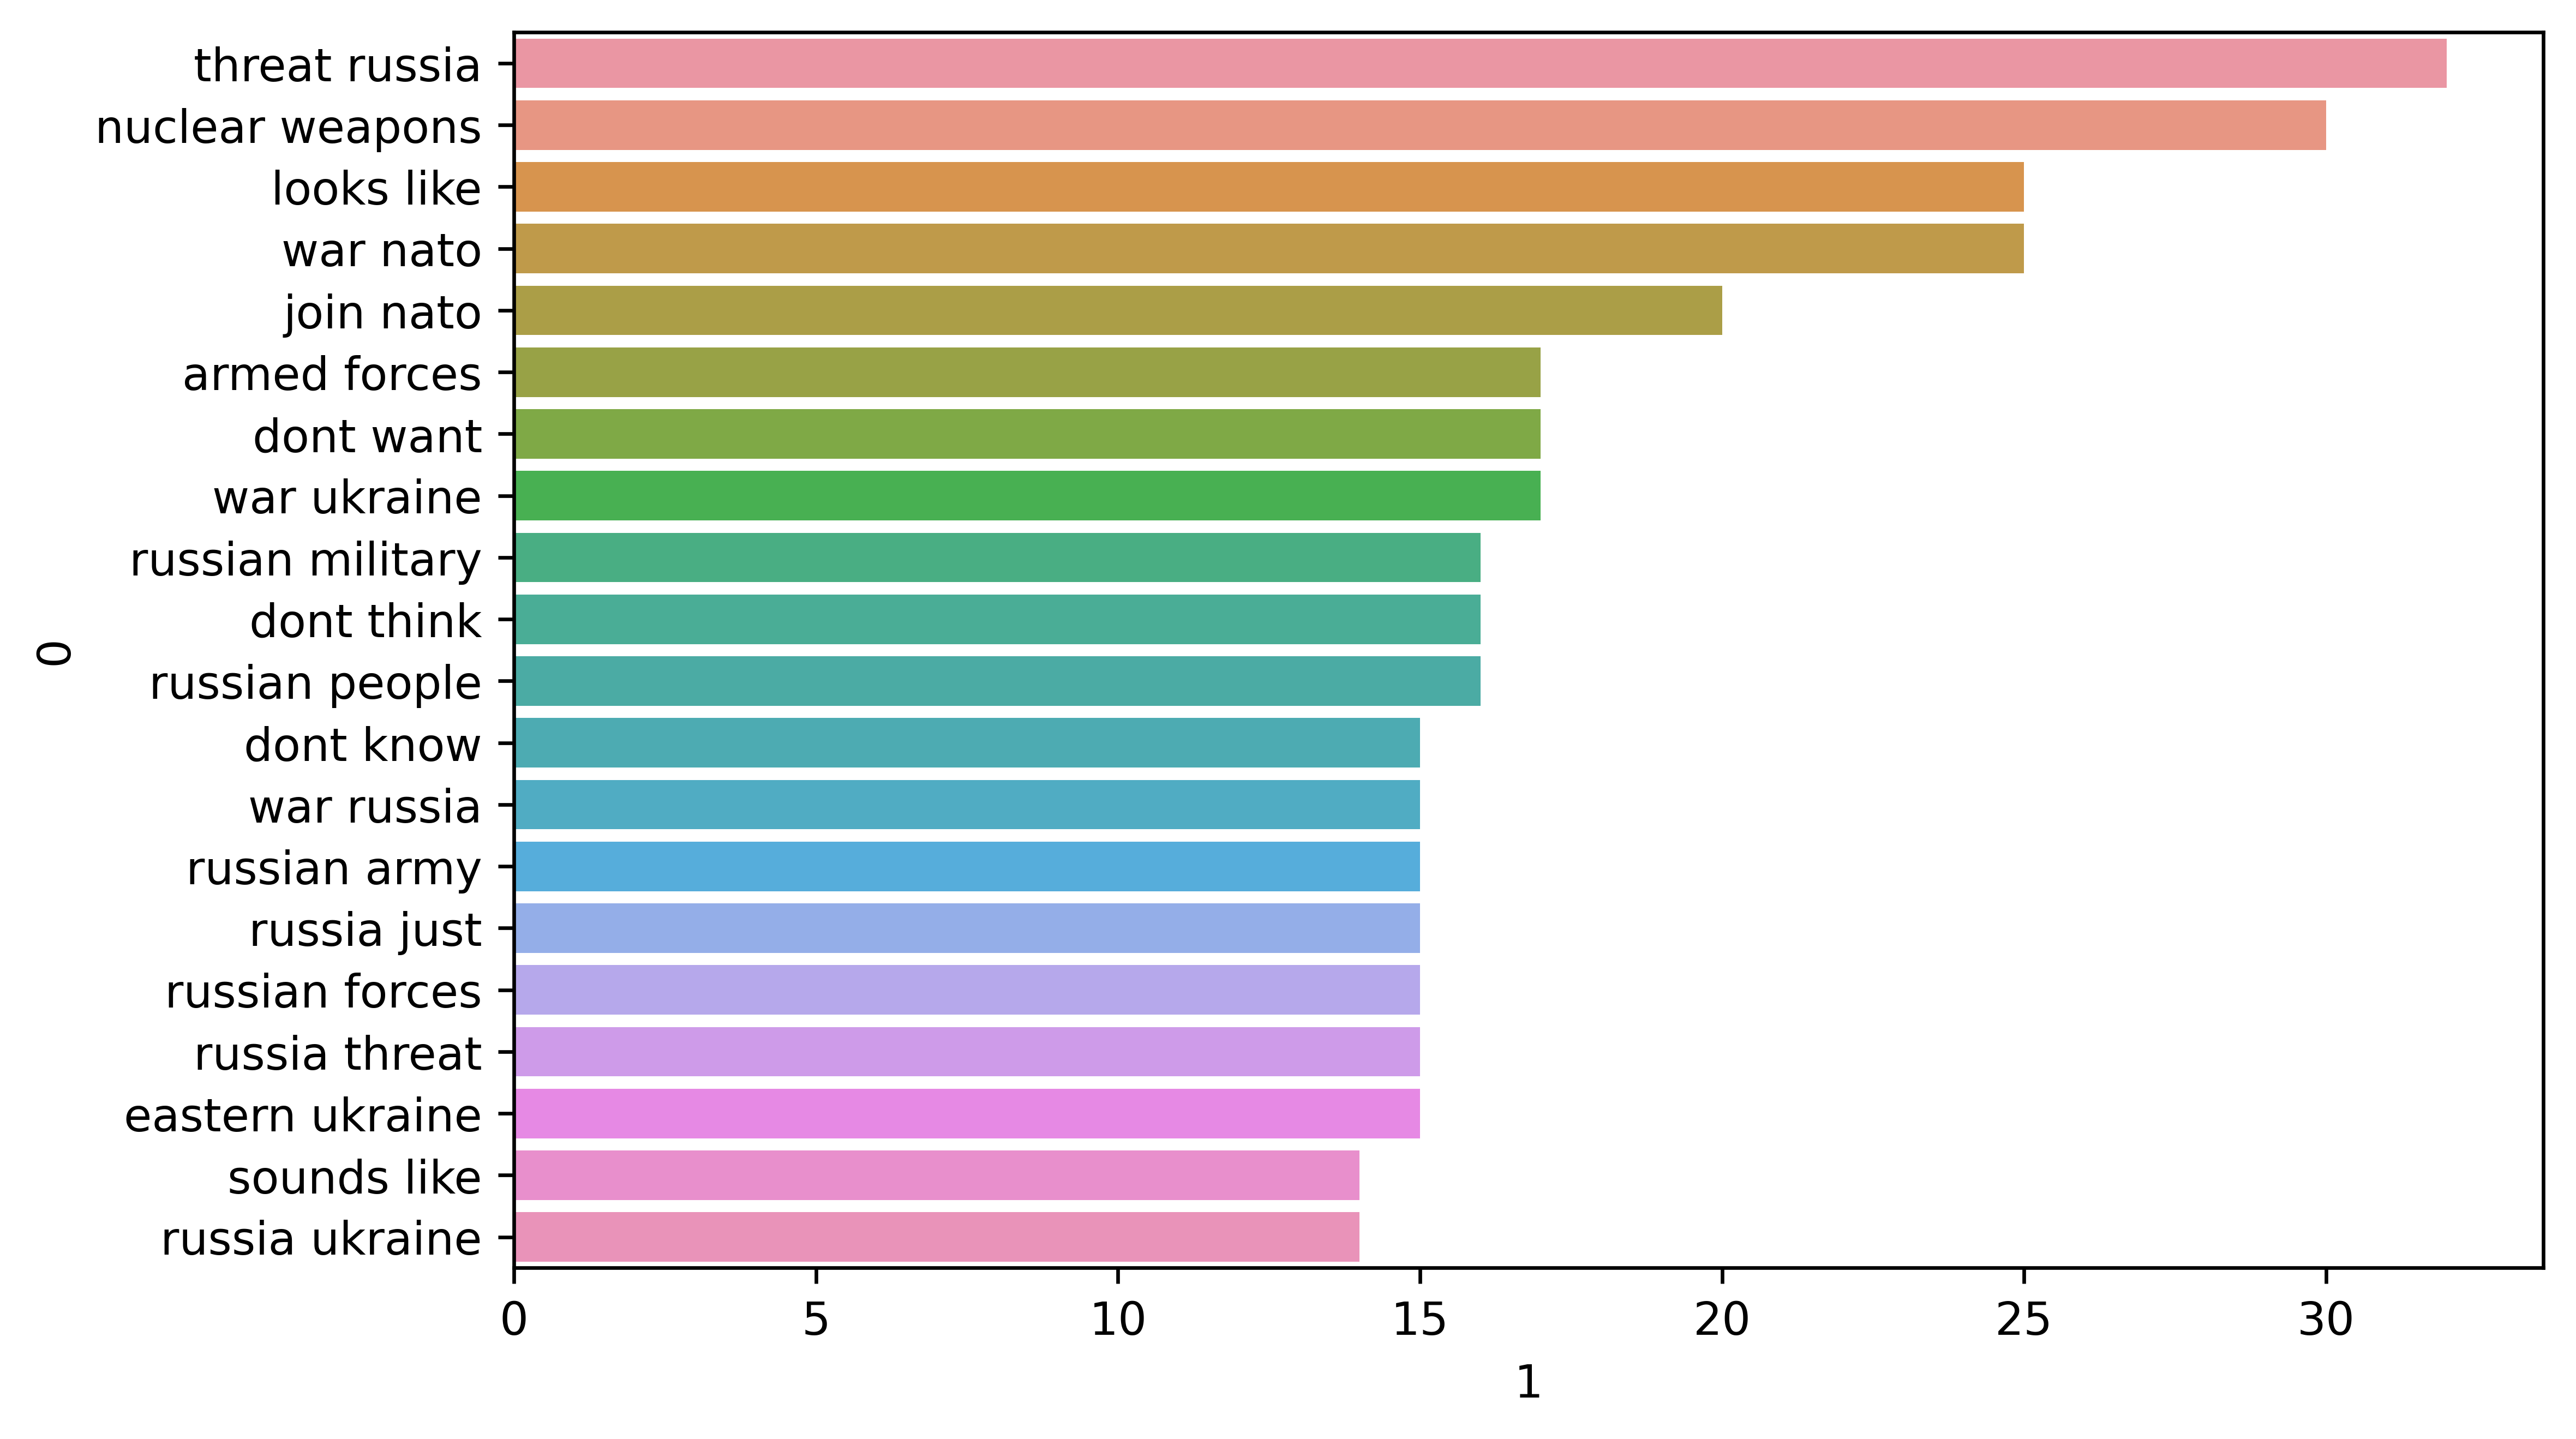

In [ ]:
def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range,
                          stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
 
# n2_bigram
n2_bigrams = get_top_n_gram(df_list['cleaned_comments'], (2, 2), 20)
plt.figure(figsize=(8, 5),
           dpi=600)  # Push new figure on stack
 
sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n2_bigrams))
plt.savefig('bigram.jpg')  # Save that figure
 
